In [1]:
library(anndata)
library(Signac)
library(Seurat)
library(anndata)
library(ggplot2)
library(tidyverse)
library(Signac)
library(Seurat)
library(BSgenome.Mmusculus.UCSC.mm10)
library(stringr)

Attaching SeuratObject

── Attaching packages ────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
✔ purrr   1.0.0      
── Conflicts ───────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()   masks stats::filter()
✖ dplyr::lag()      masks stats::lag()
✖ readr::read_csv() masks anndata::read_csv()
✖ purrr::reduce()   masks Signac::reduce()
Lade nötiges Paket: BSgenome

Lade nötiges Paket: BiocGenerics


Attache Paket: ‘BiocGenerics’


Die folgenden Objekte sind maskiert von ‘package:dplyr’:

    combine, intersect, setdiff, union


Die folgenden Objekte sind maskiert von ‘package:stats’:

    IQR, mad, sd, var, xtabs


Die folgenden Objekte sind maskiert von ‘package:base’:

    Filter, Find, Map, Position, Reduce, anyDuplicated, aperm, a

In [41]:
install.packages('qlcMatrix')

installiere auch Abhängigkeiten ‘slam’, ‘sparsesvd’, ‘docopt’


Aktualisiere HTML-Index der Pakete in '.Library'

Making 'packages.html' ...
 fertig



In [2]:
data_dir <- "../.."
seurat <- readRDS(path.cat(data_dir, "seurat_filtered.rds"))

In [3]:
seurat@meta.data$refinement <- seurat@meta.data$Fev_delta_refinement

In [4]:
seurat@meta.data$refinement[(seurat@meta.data$Ngn3_high_refinement != "Ngn3 high,5") & (seurat@meta.data$Fev_delta_refinement == "Ngn3 high")] <- "Ngn3 high,0"
seurat@meta.data$refinement[seurat@meta.data$Ngn3_high_refinement == "Ngn3 high,5"] <- "Ngn3 high,1"


In [5]:
endocrine_cell_types_red <- c(
    "Fev+ Delta,0",
    "Fev+ Delta,1",
    "Fev+ Delta,2",
    "Eps. progenitors",
    "Alpha",
    "Beta",
    "Delta",
    "Epsilon"
)

In [6]:
cols <- c( 'Prlf. Ductal'='#f7b6d2', 'Ductal'='#d62728', 'Imm. Acinar'='#ffeb3b', 'Mat. Acinar'='#98df8a',
    'Alpha'='#1f77b4', 'Beta'='#ff7f0e', 'Delta'='#279e68', 'Eps. progenitors'='#aa40fc', 'Epsilon'='#8c564b',
       'Fev+'='#e377c2', 'Fev+ Alpha'='#b5bd61', 'Fev+ Beta'='#aec7e8', 'Fev+ Delta'='#aec7e8', 'Fev+ Delta,0'='#ffbb78', 'Fev+ Delta,1'='#98df8a',
        'Fev+ Delta,2'='#17becf', 'Ngn3 high cycling'='#aec7e8',
        'Ngn3 high,0'='#ff9896', 'Ngn3 high'='#ff9896', 'Ngn3 high,1'='#f0b98d', 'Ngn3 low'='#c5b0d5')

In [7]:
Idents(seurat) <- seurat@meta.data[["refinement"]]

In [8]:
#seurat <- subset(x=seurat, idents= endocrine_cell_types)

In [9]:
Idents(seurat) <- factor(Idents(seurat), levels = endocrine_cell_types_red)

In [10]:
seurat <- subset(x=seurat, idents= endocrine_cell_types_red)

In [13]:
markers <- read.csv(path.cat(data_dir, "driver_eps_prog_peaks.csv"))

In [39]:
markers_selected <- head(markers, 15)$X

In [43]:
seurat

An object of class Seurat 
475329 features across 1752 samples within 3 assays 
Active assay: ATAC_merged (228259 features, 228259 variable features)
 2 other assays present: RNA, ATAC
 1 dimensional reduction calculated: lsi

In [ ]:
seurat <- LinkPeaks(
  object = seurat,
  peak.assay = "ATAC_merged",
  expression.assay = "RNA",
  genes.use ="Sst",
)

Testing 1 genes and 198818 peaks



# Eps. progenitors

In [16]:
range <- markers$X[[1]]

In [17]:
p <- CoveragePlot(
  object = seurat,
  region = range,
  annotation = TRUE,
  peaks = TRUE,
  extend.upstream = 300,
  extend.downstream = 300,
  wdith=5,
  height=1.5
)

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Warning message:
“Removed 33 rows containing missing values (`geom_segment()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_segment()`).”


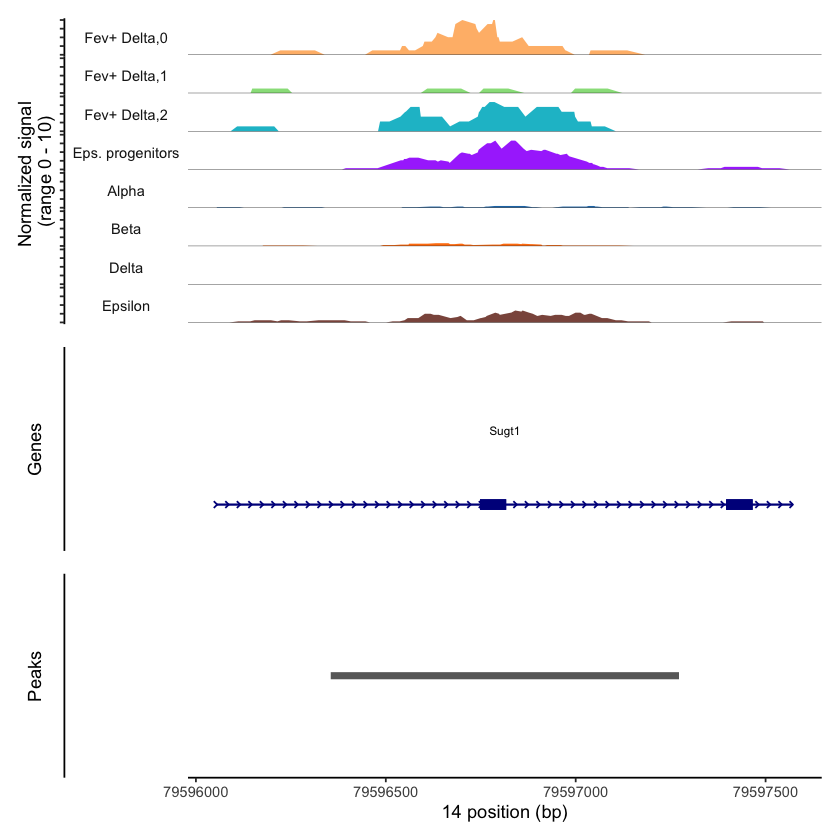

In [18]:
p & scale_fill_manual(values=cols)

In [21]:
range <- markers$X[[2]]

In [22]:
p <- CoveragePlot(
  object = seurat,
  region = range,
  annotation = TRUE,
  peaks = TRUE,
  extend.upstream = 300,
  extend.downstream = 300,
  wdith=5,
  height=1.5
)

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


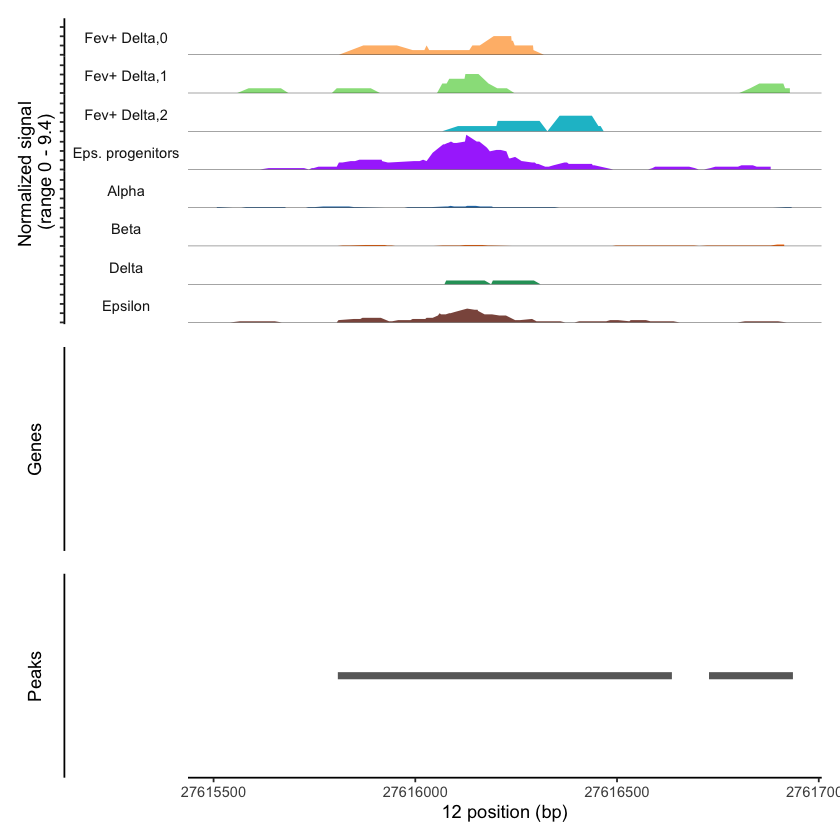

In [23]:
p & scale_fill_manual(values=cols)

In [24]:
range <- markers$X[[3]]

In [25]:
p <- CoveragePlot(
  object = seurat,
  region = range,
  annotation = TRUE,
  peaks = TRUE,
  extend.upstream = 300,
  extend.downstream = 300,
  wdith=5,
  height=1.5
)

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Warning message:
“Removed 3 rows containing missing values (`geom_segment()`).”


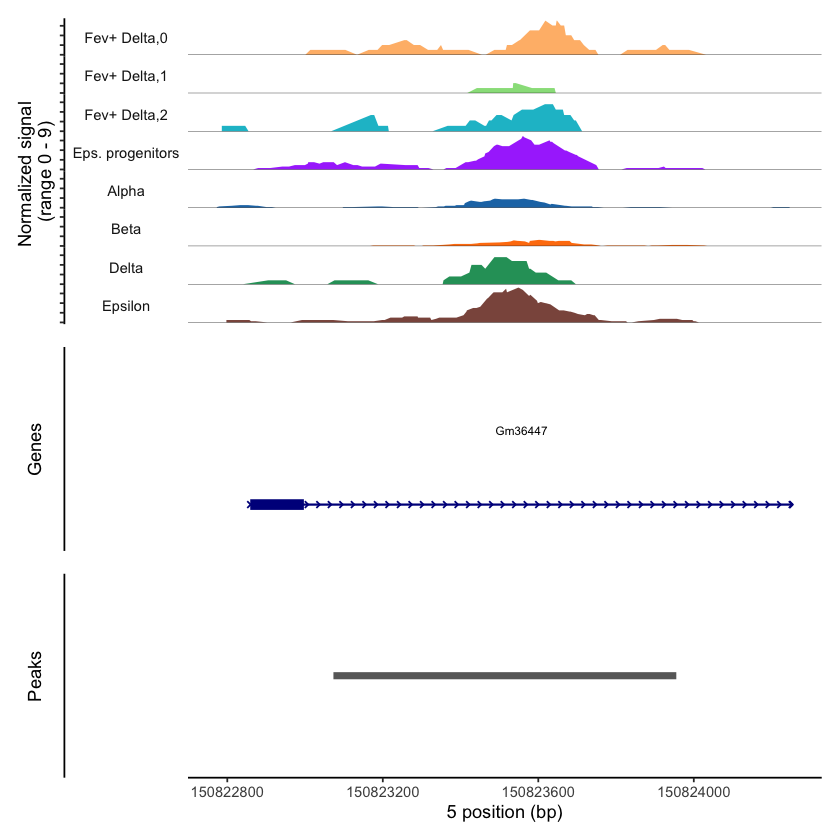

In [26]:
p & scale_fill_manual(values=cols)

In [27]:
range <- markers$X[[4]]

In [28]:
p <- CoveragePlot(
  object = seurat,
  region = range,
  annotation = TRUE,
  peaks = TRUE,
  extend.upstream = 300,
  extend.downstream = 300,
  wdith=5,
  height=1.5
)

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


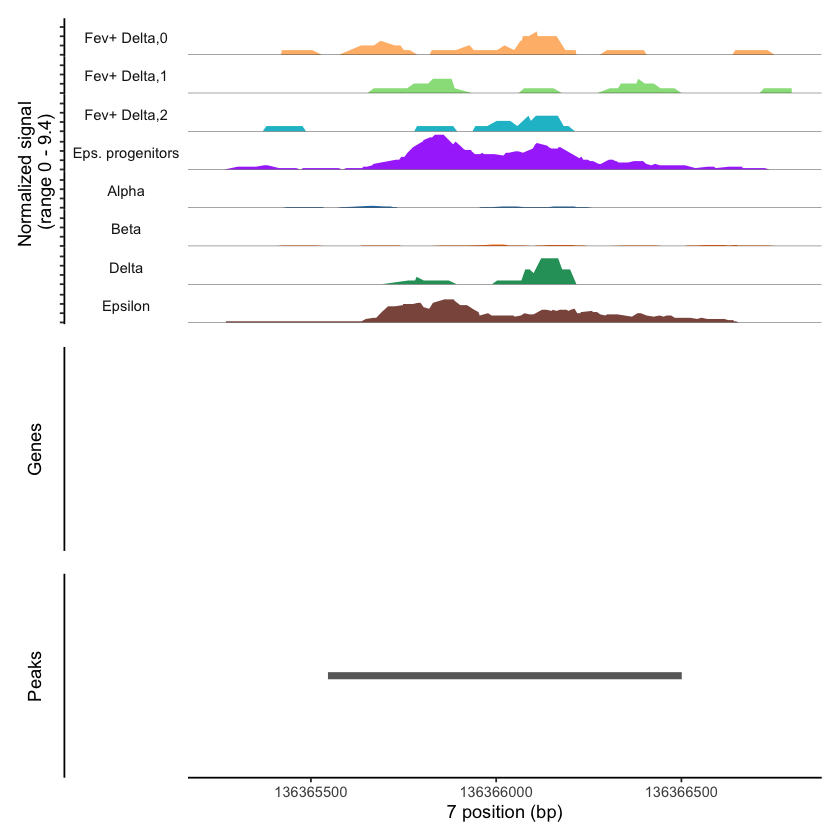

In [29]:
p & scale_fill_manual(values=cols)

In [30]:
range <- markers$X[[5]]

In [31]:
p <- CoveragePlot(
  object = seurat,
  region = range,
  annotation = TRUE,
  peaks = TRUE,
  extend.upstream = 300,
  extend.downstream = 300,
  wdith=5,
  height=1.5
)

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


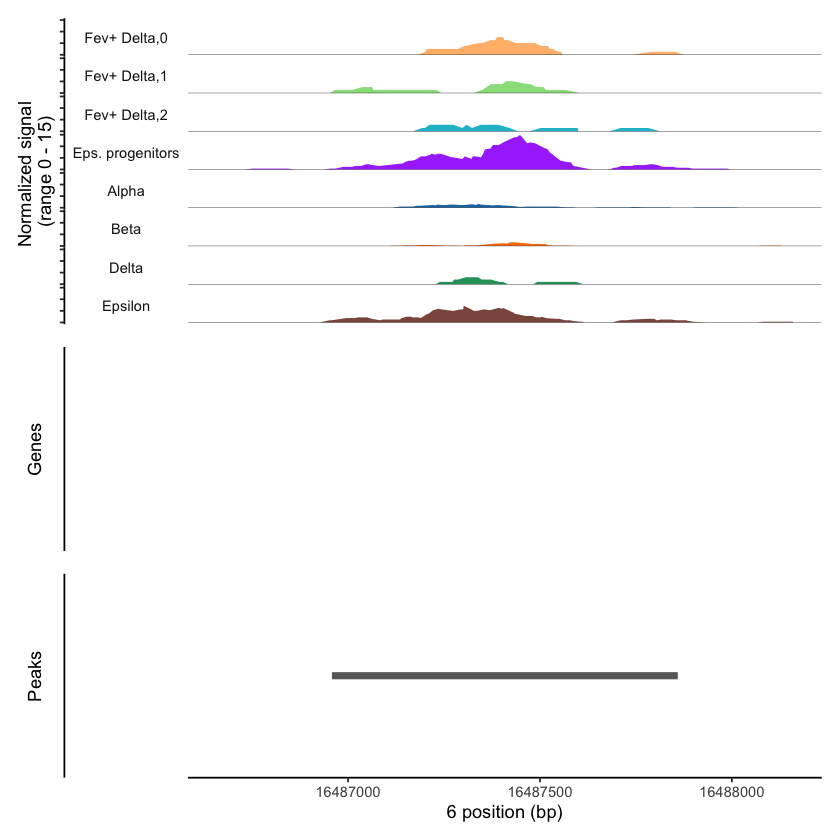

In [32]:
p & scale_fill_manual(values=cols)

In [34]:
range <- markers$X[[6]]

In [35]:
p <- CoveragePlot(
  object = seurat,
  region = range,
  annotation = TRUE,
  peaks = TRUE,
  extend.upstream = 300,
  extend.downstream = 300,
  wdith=5,
  height=1.5
)

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


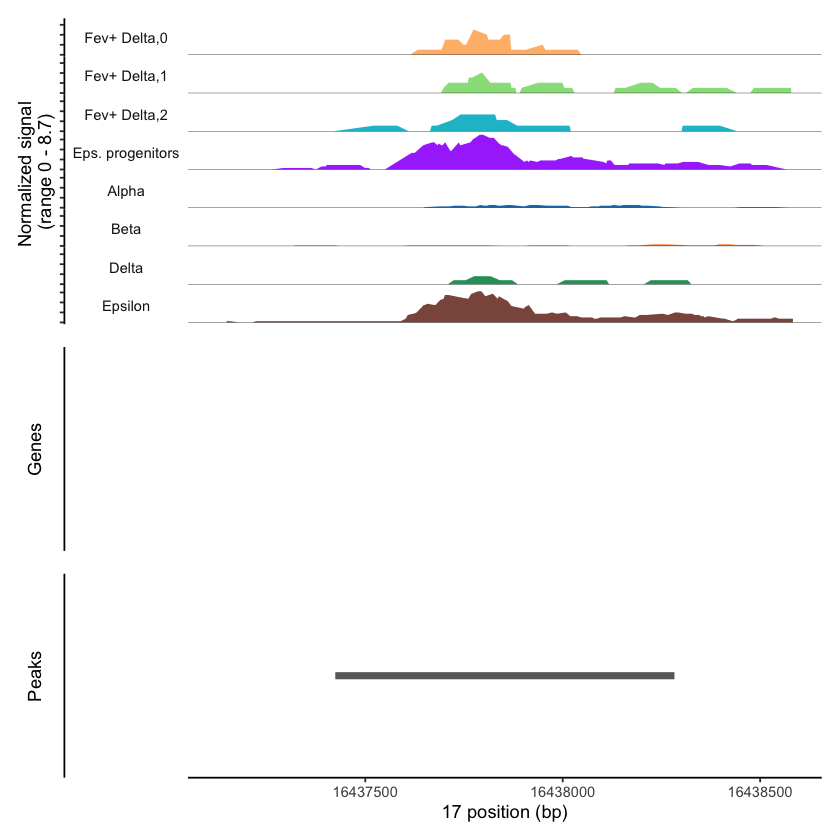

In [36]:
p & scale_fill_manual(values=cols)

In [19]:
links <- LinkPlot(object = seurat, region = range)  + scale_color_gradient2(low = "#d8002d", mid = "gray95",high = "#0075d7", midpoint = 0)#+ scale_color_viridis_c("Score",option = "mako", begin = 0.25, end = 1, direction = -1) #


In [20]:
links

NULL

# Delta

In [15]:
LookupGeneCoords(seurat, "Sst", assay = NULL)[1]
 

GRanges object with 1 range and 0 metadata columns:
      seqnames            ranges strand
         <Rle>         <IRanges>  <Rle>
  [1]       16 23889573-23890958      *
  -------
  seqinfo: 1 sequence from an unspecified genome; no seqlengths

In [16]:
sst_range = "16-23889573-23890958"

In [17]:
p <- CoveragePlot(
  object = seurat,
  region = sst_range,
  annotation = TRUE,
  peaks = TRUE,
  extend.upstream = 300,
  extend.downstream = 300,
  wdith=5,
  height=1.5
)

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


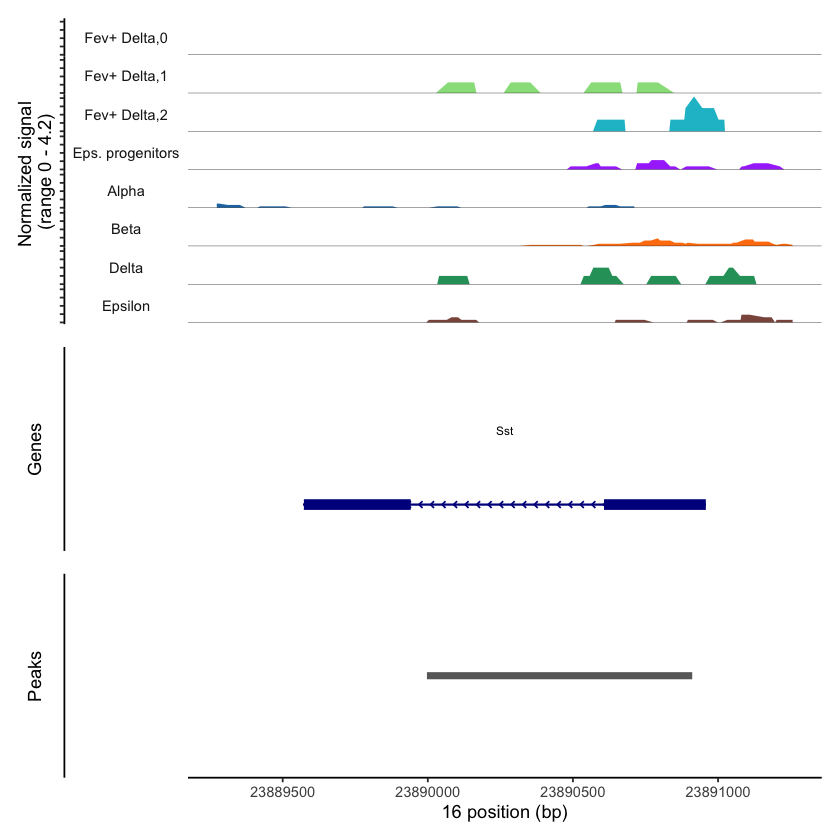

In [18]:
p & scale_fill_manual(values=cols)

# Beta

In [19]:
LookupGeneCoords(seurat, "Ins2", assay = NULL)[1]
 

GRanges object with 1 range and 0 metadata columns:
      seqnames              ranges strand
         <Rle>           <IRanges>  <Rle>
  [1]        7 142678656-142743381      *
  -------
  seqinfo: 1 sequence from an unspecified genome; no seqlengths

In [20]:
ins2_range = "7-142678656-142743381"

In [22]:
ins_2_range2 = "7-142678656-142679685"

In [23]:
p <- CoveragePlot(
  object = seurat,
  region = ins_2_range2,
  annotation = TRUE,
  peaks = TRUE,
  extend.upstream = 300,
  extend.downstream = 300,
  wdith=5,
  height=1.5
)

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Warning message:
“Removed 4 rows containing missing values (`geom_segment()`).”


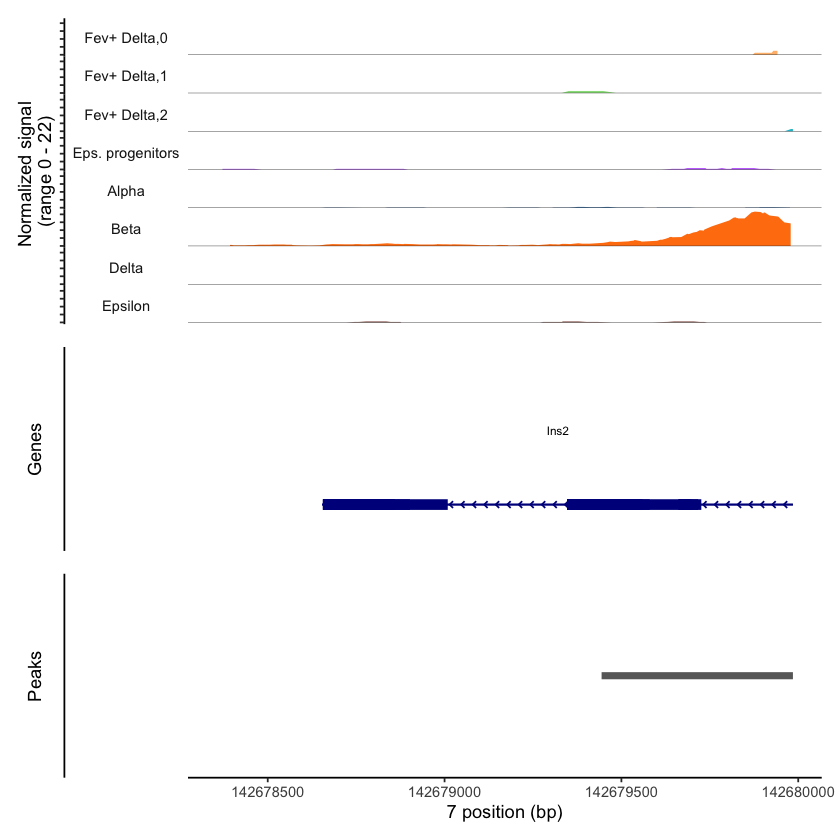

In [24]:
p & scale_fill_manual(values=cols)

In [23]:
p <- CoveragePlot(
  object = seurat,
  region = "7-142743000-142743381",
  annotation = TRUE,
  peaks = TRUE,
  extend.upstream = 300,
  extend.downstream = 300,
  wdith=5,
  height=1.5,
)

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Warning message:
“Removed 25 rows containing missing values (`geom_segment()`).”


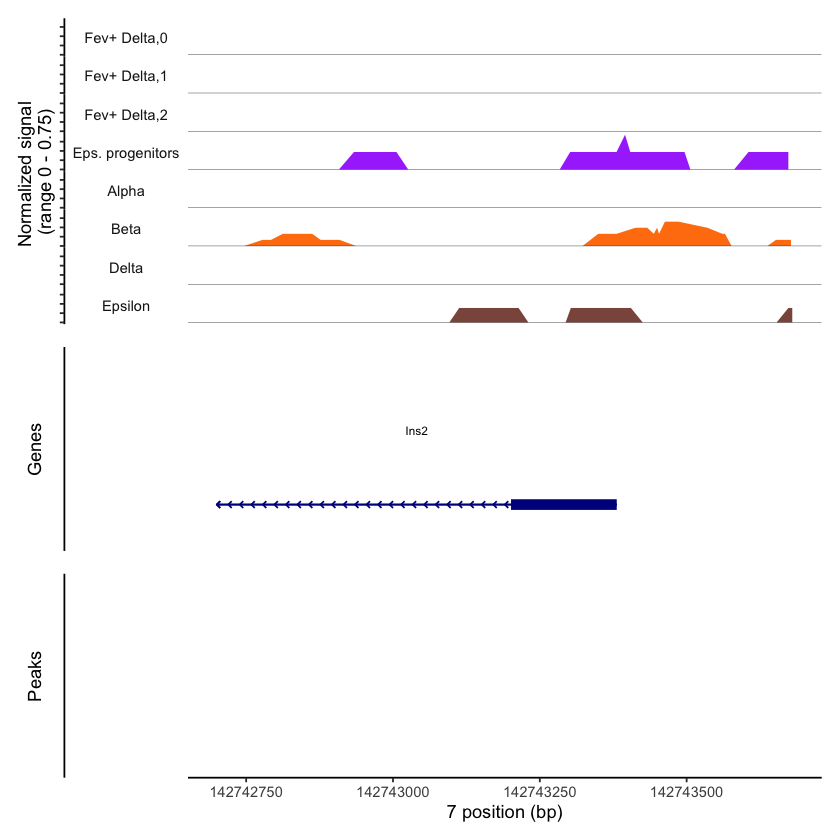

In [24]:
p & scale_fill_manual(values=cols)

# Epsilon 

In [25]:
LookupGeneCoords(seurat, "Ghrl", assay = NULL)[1]
 

GRanges object with 1 range and 0 metadata columns:
      seqnames              ranges strand
         <Rle>           <IRanges>  <Rle>
  [1]        6 113716119-113719880      *
  -------
  seqinfo: 1 sequence from an unspecified genome; no seqlengths

In [26]:
ghrl_range = "6-113716119-113719880"

In [27]:
p <- CoveragePlot(
  object = seurat,
  region =ghrl_range,
  annotation = TRUE,
  peaks = TRUE,
  extend.upstream = 300,
  extend.downstream = 300,
  wdith=5,
  height=1.5
    
)


Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


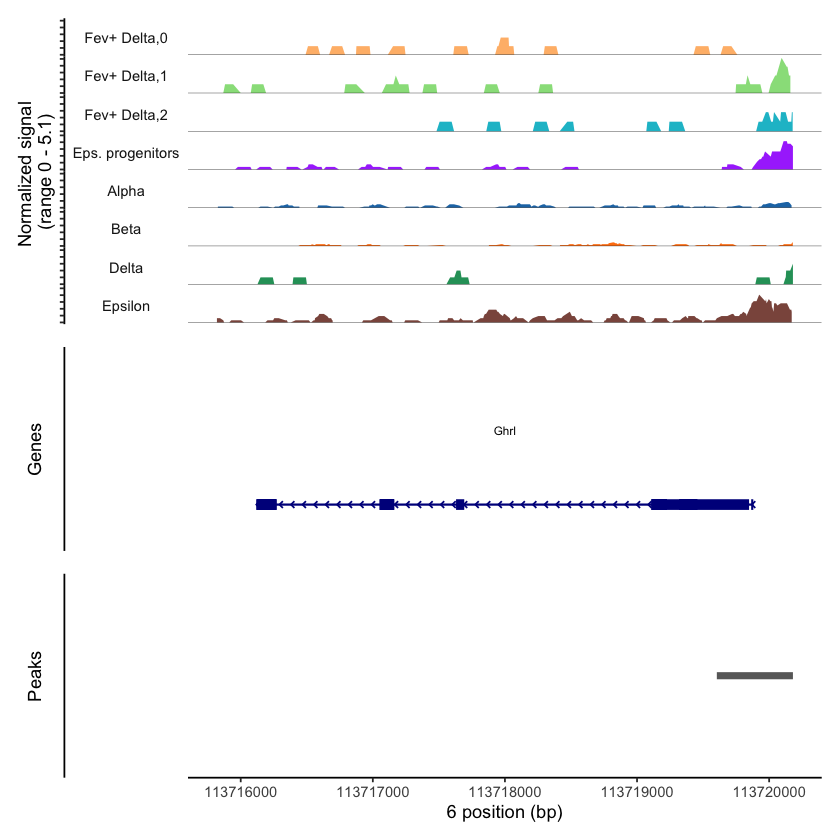

In [28]:
p & scale_fill_manual(values=cols)